In [401]:
import pandas as pd
import numpy as np

x_train = pd.read_csv('Dataset/x_train_all.csv')  

summary_stats = x_train.describe()
summary_stats

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


## Initial scores:

#### 10 clusters - 0.14337657005172605
#### 8 clusters - 0.15572181678470226
#### 6 clusters - 0.20639571486279004
#### 4 clusters - 0.3119771748068869
#### 2 clusters - 0.3568434794605163

In [452]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def kmeansfunc(data, k):
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    print("Inertia: ", kmeans.inertia_)
    return clusters

def silhouetteScore(data, clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    print("Silhouette Score:", silhouette_avg)
    return silhouette_avg

def db_score(data, clustersdata):
    davies_bouldin = davies_bouldin_score(data, clustersdata)
    print("Davies-Bouldin Score:", davies_bouldin)
    return davies_bouldin

def calinski_score(data, clustersdata):
    calinski_harabasz = calinski_harabasz_score(data, clustersdata)
    print("Calinski-Harabasz Score:", calinski_harabasz)
    return calinski_harabasz



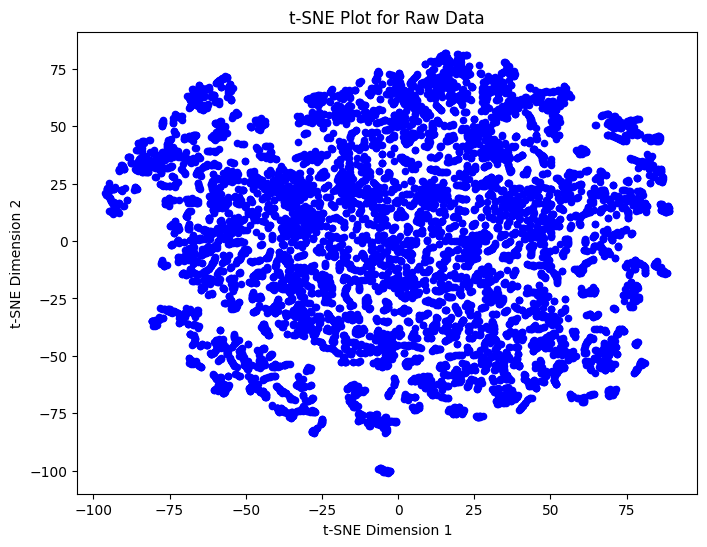

In [403]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

raw_data = x_train.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(raw_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [404]:
clusters_raw2 = kmeansfunc(raw_data, 2)
clusters_raw2 = clusters_raw2.to_numpy().ravel()
db_score(raw_data, clusters_raw2)
calinski_score(raw_data, clusters_raw2)
silhouetteScore(raw_data,clusters_raw2)

Inertia:  65497786443.08869
Davies-Bouldin Score: 1.3051138364604997
Calinski-Harabasz Score: 5148.986891793889
Silhouette Score: 0.3568434794605163


0.3568434794605163

In [405]:
clusters_raw4 = kmeansfunc(raw_data, 4)
clusters_raw4 = clusters_raw4.to_numpy().ravel()
db_score(raw_data, clusters_raw4)
calinski_score(raw_data, clusters_raw4)
silhouetteScore(raw_data,clusters_raw4)

Inertia:  49316167920.45112
Davies-Bouldin Score: 1.6143965996818797
Calinski-Harabasz Score: 3338.410099772859
Silhouette Score: 0.3119771748068869


0.3119771748068869

In [406]:
clusters_raw6 = kmeansfunc(raw_data, 6)
clusters_raw6 = clusters_raw6.to_numpy().ravel()
db_score(raw_data, clusters_raw6)
calinski_score(raw_data, clusters_raw6)
silhouetteScore(raw_data,clusters_raw6)

Inertia:  42723769606.66766
Davies-Bouldin Score: 1.7383688447218548
Calinski-Harabasz Score: 2610.498018909493
Silhouette Score: 0.20639571486279004


0.20639571486279004

In [407]:
clusters_raw8 = kmeansfunc(raw_data, 8)
clusters_raw8 = clusters_raw8.to_numpy().ravel()
db_score(raw_data, clusters_raw8)
calinski_score(raw_data, clusters_raw8)
silhouetteScore(raw_data,clusters_raw8)

Inertia:  39315928092.10597
Davies-Bouldin Score: 1.827772212142516
Calinski-Harabasz Score: 2145.735692943448
Silhouette Score: 0.15572181678470226


0.15572181678470226

In [408]:
clusters_raw10 = kmeansfunc(raw_data, 10)
clusters_raw10 = clusters_raw10.to_numpy().ravel()
db_score(raw_data, clusters_raw10)
calinski_score(raw_data, clusters_raw10)
silhouetteScore(raw_data,clusters_raw10)

Inertia:  37364768966.3394
Davies-Bouldin Score: 1.8546934033798876
Calinski-Harabasz Score: 1811.8564129653143
Silhouette Score: 0.14337657005172605


0.14337657005172605

In [409]:
silhouette_scores = []
inertia = []
cluster_range = range(2, 16)


for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    graph_clusters = kmeans.fit_predict(x_train)
    graph_clusters = graph_clusters.ravel()
    inertia.append(kmeans.inertia_)
    score = silhouetteScore(x_train, graph_clusters)
    silhouette_scores.append(score)

Silhouette Score: 0.3568434794605163
Silhouette Score: 0.31787386895790926
Silhouette Score: 0.3119771748068869
Silhouette Score: 0.2138514956492619
Silhouette Score: 0.20639571486279004
Silhouette Score: 0.20870216130087987
Silhouette Score: 0.15572181678470226
Silhouette Score: 0.1420112913785431
Silhouette Score: 0.14337657005172605
Silhouette Score: 0.1364338850163759
Silhouette Score: 0.1359093551086233
Silhouette Score: 0.13748274838828584
Silhouette Score: 0.13491903897182722
Silhouette Score: 0.1353529757412136


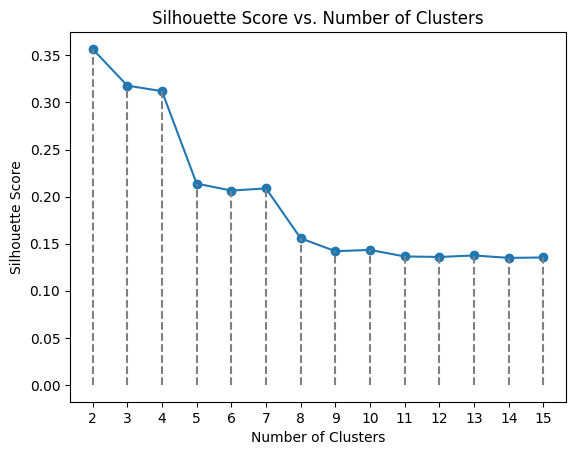

In [410]:
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouette_scores[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [411]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

p_df = pd.read_csv('processed_df2.csv')
p_df.shape

(9690, 2304)

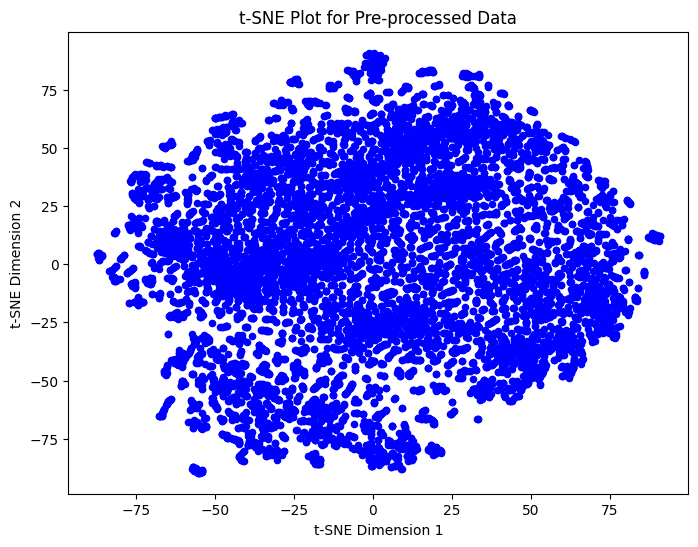

In [412]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

preprocessed_data = p_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

preprocessed_embedded = tsne.fit_transform(preprocessed_data)

plt.figure(figsize=(8, 6))
plt.scatter(preprocessed_embedded[:, 0], preprocessed_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Pre-processed Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [413]:
def grayscale_to_infrared(grayscale_image):
    row = np.array(grayscale_image, dtype=np.uint8)
    color_map = plt.get_cmap('hot')
    normalized_image = row / 255.0
    infrared_image = (color_map(normalized_image)[:, :, 0] * 255).astype(np.uint8)
    return infrared_image.flatten()

In [414]:
infrared_original = []

for i, idx in enumerate(x_train.index):
    original_image = x_train.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_org = pd.DataFrame(infrared_original)
infrared_df_org.shape

(9690, 2304)

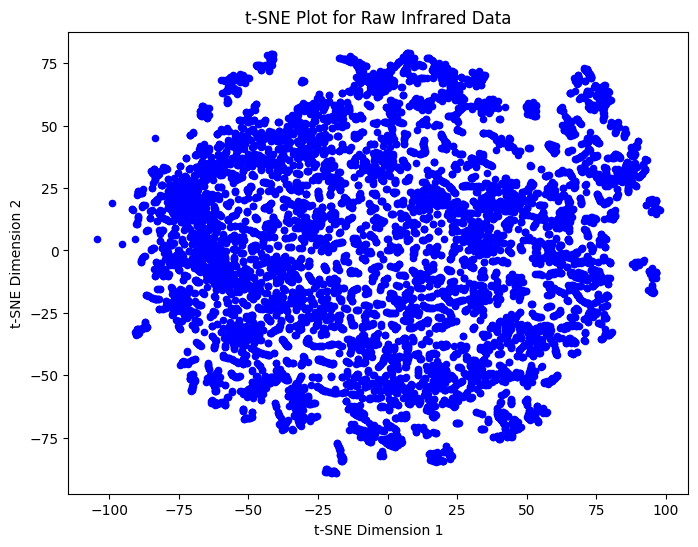

In [415]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


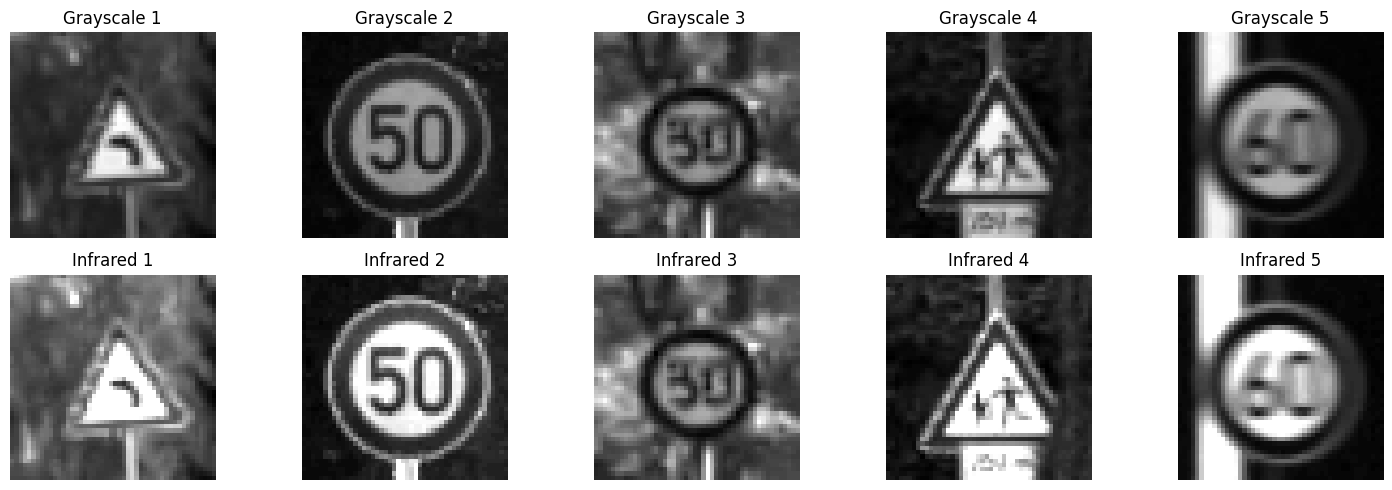

In [416]:
sample_size = 5
sample_indices = np.random.choice(range(len(infrared_df_org)), sample_size, replace=False)

x_train_reset = infrared_df_org.reset_index(drop=True)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(sample_indices):
    original_image = x_train.iloc[idx].values.reshape(48, 48)
    processed_image = x_train_reset.iloc[idx].values.reshape(48, 48)

    plt.subplot(2, sample_size, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Grayscale {i+1}')
    plt.axis('off')

    plt.subplot(2, sample_size, sample_size + i + 1)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f'Infrared {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [417]:
clusters = kmeansfunc(infrared_df_org, 10)
clusters = clusters.to_numpy().ravel()
db_score(infrared_df_org, clusters)
calinski_score(infrared_df_org, clusters)
silhouetteScore(infrared_df_org,clusters)

Inertia:  42586399938.51187
Davies-Bouldin Score: 2.039513157390206
Calinski-Harabasz Score: 2074.2512632638036
Silhouette Score: 0.13481848683347666


0.13481848683347666

In [418]:
from sklearn.ensemble import IsolationForest

feature_names = [f'feature_{str(col)}' for col in x_train.columns]
infrared_copy = x_train.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_no_outliers = infrared_copy.drop(outlier_indices)
infra_no_outliers.to_csv('x_train_no_outliers.csv',index=False)

outlier_indices_df = pd.DataFrame({'outlier_index': outlier_indices})

outlier_indices_df.to_csv('outlier_indices.csv', index=False)

In [419]:
clusters = kmeansfunc(infra_no_outliers, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
silhouetteScore(infra_no_outliers,clusters)

Inertia:  36507130738.34281
Davies-Bouldin Score: 1.872209273196369
Calinski-Harabasz Score: 1738.022396950417
Silhouette Score: 0.14197652594783366


0.14197652594783366

In [420]:
mean=infra_no_outliers.mean()
std=infra_no_outliers.std()
infra_norm=(infra_no_outliers-mean)/std

In [421]:
clusters = kmeansfunc(infra_norm, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_norm, clusters)
calinski_score(infra_norm, clusters)
silhouetteScore(infra_norm,clusters)

Inertia:  8628579.582745984
Davies-Bouldin Score: 2.028669552154143
Calinski-Harabasz Score: 1662.3865938708923
Silhouette Score: 0.1368738510055143


0.1368738510055143

In [422]:
mean=x_train.mean()
std=x_train.std()
x_norm=(x_train-mean)/std

In [423]:
infrared_original = []

for i, idx in enumerate(x_norm.index):
    original_image = x_norm.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_norm = pd.DataFrame(infrared_original)
infrared_df_norm.shape

(9690, 2304)

In [424]:
clusters = kmeansfunc(infrared_df_norm, 10)
clusters = clusters.to_numpy().ravel()
db_score(infrared_df_norm, clusters)
calinski_score(infrared_df_norm, clusters)
silhouetteScore(infrared_df_norm, clusters)

Inertia:  28916431035.709877
Davies-Bouldin Score: 2.4929967816354783
Calinski-Harabasz Score: 1577.8280725389689
Silhouette Score: 0.5046952615364717


0.5046952615364717

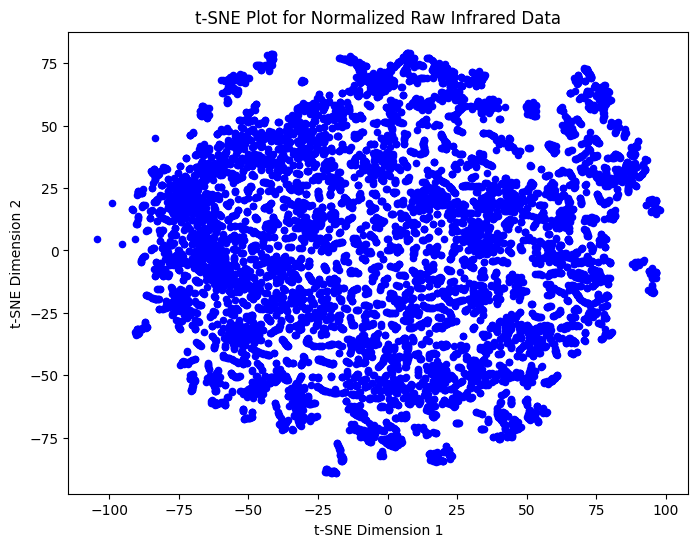

In [425]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Normalized Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [426]:
from sklearn.ensemble import IsolationForest

feature_names = [f'feature_{str(col)}' for col in infrared_df_norm.columns]
infrared_copy = infrared_df_norm.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_norm_no_outliers = infrared_copy.drop(outlier_indices)

In [427]:
clusters = kmeansfunc(infra_norm_no_outliers, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
silhouetteScore(infra_norm_no_outliers, clusters)

Inertia:  27467387926.813747
Davies-Bouldin Score: 9.504043167685627
Calinski-Harabasz Score: 82.31682699456356
Silhouette Score: 0.5016481867119463


0.5016481867119463

In [428]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19)
    kmeans.fit(infra_norm_no_outliers) 
    wcss.append(kmeans.inertia_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

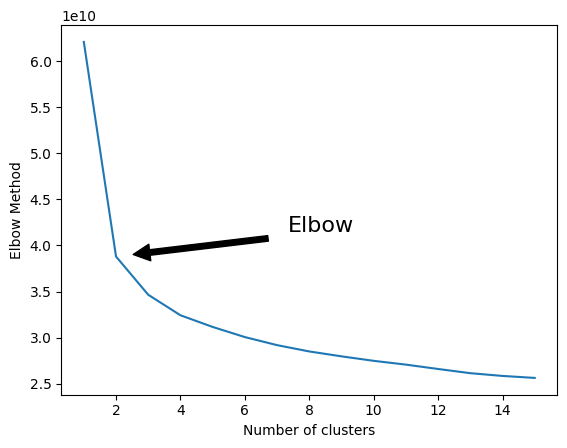

In [429]:
plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.annotate('Elbow',
             xy=(2, wcss[1]),
             xytext=(0.45, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.ylabel('Elbow Method') 
plt.show()

In [430]:
clusters = kmeansfunc(infra_norm_no_outliers, 2)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
silhouetteScore(infra_norm_no_outliers,clusters)

Inertia:  38799395156.324585
Davies-Bouldin Score: 2.5573218315157584
Calinski-Harabasz Score: 436.12818632460574
Silhouette Score: 0.6776758908035815


0.6776758908035815

In [431]:
def apply_gaussian_blur(row, kernel_size=(5, 5), sigma=0):
    row = np.array(row, dtype=np.uint8)
    row = cv2.GaussianBlur(row, kernel_size, sigma)
    return row

def apply_clahe(row):
    row = np.array(row, dtype=np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_row = clahe.apply(row)
    return equalized_row

In [432]:
infrared_prep = []

for index, row in infra_norm_no_outliers.iterrows():
    image_data = row.values
    gaussian_image = apply_gaussian_blur(image_data)
    equalized_image = apply_clahe(gaussian_image)
    infrared_prep.append(equalized_image.flatten())

prepped_infrared_df = pd.DataFrame(infrared_prep)
prepped_infrared_df.shape

(9593, 2304)

In [433]:
infra_norm_no_outliers.shape

(9593, 2304)

In [434]:
def kmeansfunc_iter(data, k, seed):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    print(clusters)
    return clusters

def silhouetteScore_iter(data,clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    return silhouette_avg

In [435]:
seed_value = 0
max_score = 0
best_seed = 0

while seed_value<101:
    clusters = kmeansfunc_iter(prepped_infrared_df, 10, seed_value)
    cur_score = silhouetteScore_iter(prepped_infrared_df, clusters)
    if cur_score > max_score:
        best_seed = seed_value
        max_score = cur_score
    seed_value = seed_value + 1

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     6
1     6
2     6
3     6
4     6
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  3
9589  3
9590  3
9591  3
9592  3

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  2
9589  2
9590  2
9591  2
9592  2

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     3
1     3
2     3
3     3
4     3
...  ..
9588  5
9589  5
9590  5
9591  5
9592  5

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  5
9589  5
9590  5
9591  5
9592  5

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     7
1     7
2     7
3     7
4     7
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  3
9589  3
9590  3
9591  3
9592  3

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     5
1     5
2     5
3     5
4     5
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     7
1     7
2     7
3     7
4     7
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  5
9589  5
9590  5
9591  5
9592  5

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  3
9589  3
9590  3
9591  3
9592  3

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     7
1     7
2     7
3     7
4     7
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  5
9589  5
9590  5
9591  5
9592  5

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  2
9589  2
9590  2
9591  2
9592  2

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  3
9589  3
9590  3
9591  3
9592  3

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  3
9589  3
9590  3
9591  3
9592  3

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     9
1     9
2     9
3     9
4     9
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     4
1     4
2     4
3     4
4     4
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  3
9589  3
9590  3
9591  3
9592  3

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  5
9589  5
9590  5
9591  5
9592  5

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  1
9589  1
9590  1
9591  1
9592  1

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     2
1     2
2     2
3     2
4     2
...  ..
9588  6
9589  6
9590  6
9591  6
9592  6

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     8
1     8
2     8
3     8
4     8
...  ..
9588  2
9589  2
9590  2
9591  2
9592  2

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  8
9589  8
9590  8
9591  8
9592  8

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  4
9589  4
9590  4
9591  4
9592  4

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     1
1     1
2     1
3     1
4     1
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     5
1     5
2     5
3     5
4     5
...  ..
9588  2
9589  2
9590  2
9591  2
9592  2

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  9
9589  9
9590  9
9591  9
9592  9

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     6
1     6
2     6
3     6
4     6
...  ..
9588  0
9589  0
9590  0
9591  0
9592  0

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
9588  7
9589  7
9590  7
9591  7
9592  7

[9593 rows x 1 columns]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [436]:
print(best_seed)
max_score

19


0.5041986688186679

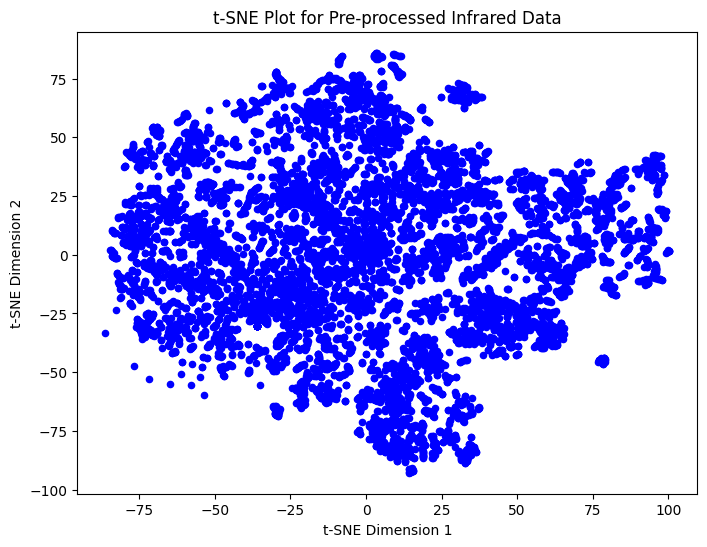

In [437]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [438]:
clusters = kmeansfunc(prepped_infrared_df, 10)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df, clusters)
calinski_score(prepped_infrared_df, clusters)
silhouetteScore(prepped_infrared_df,clusters)

Inertia:  16758303468.035269
Davies-Bouldin Score: 2.1610167138320424
Calinski-Harabasz Score: 2041.730862207949
Silhouette Score: 0.5041986688186679


0.5041986688186679

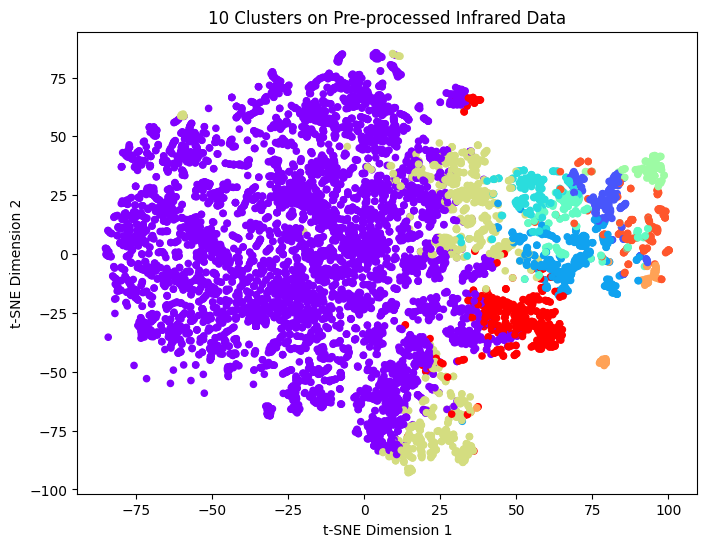

In [439]:
infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [440]:
clusters = kmeansfunc(prepped_infrared_df, 2)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df, clusters)
calinski_score(prepped_infrared_df, clusters)
silhouetteScore(prepped_infrared_df,clusters)

Inertia:  26778047697.812164
Davies-Bouldin Score: 0.9552133638986922
Calinski-Harabasz Score: 7920.712473636974
Silhouette Score: 0.7033537860848569


0.7033537860848569

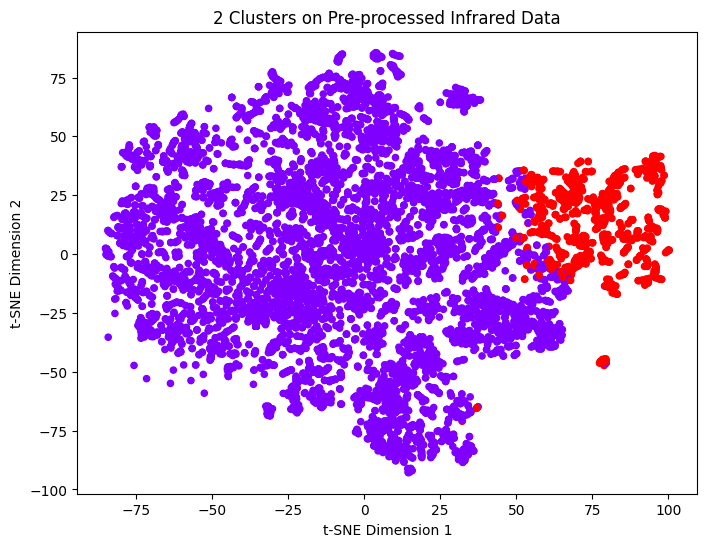

In [441]:
infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [442]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def PCAOnData(features,components):
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    return df_pca

In [464]:
df_pca_50 = PCAOnData(prepped_infrared_df, 50)
clusters_pca50 = kmeansfunc(df_pca_50, 10)
clusters_pca50 = clusters_pca50.to_numpy().ravel()
db_score(df_pca_50, clusters_pca50)
calinski_score(df_pca_50, clusters_pca50)
silhouetteScore(df_pca_50, clusters_pca50)

Inertia:  11809613549.163343
Davies-Bouldin Score: 1.6977759217605093
Calinski-Harabasz Score: 2905.676824949373
Silhouette Score: 0.5406571247462034


0.5406571247462034

In [465]:
df_pca_50 = PCAOnData(prepped_infrared_df, 50)
clusters_pca50 = kmeansfunc(df_pca_50, 2)
clusters_pca50 = clusters_pca50.to_numpy().ravel()
db_score(df_pca_50, clusters_pca50)
calinski_score(df_pca_50, clusters_pca50)
silhouetteScore(df_pca_50, clusters_pca50)

Inertia:  21924231330.402718
Davies-Bouldin Score: 0.8641430308253923
Calinski-Harabasz Score: 9674.012970757834
Silhouette Score: 0.7294100867758628


0.7294100867758628

In [466]:
image_df = prepped_infrared_df.copy()

In [467]:
import cv2
import pandas as pd
import numpy as np

# Assuming 'image_df' is your DataFrame with each row as an image

# Create a list to store the Fourier Transformed images
fourier_transformed_images = []

# Iterate through each row (image) in the DataFrame
for index, row in image_df.iterrows():
    # Convert the row (image) to a NumPy array
    image = row.values.reshape(48, 48)

    # Apply DFT to the image
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero frequency components to the center
    dft_shifted = np.fft.fftshift(dft)

    # Calculate the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])

    # Flatten the magnitude spectrum to 1D
    flattened_magnitude_spectrum = magnitude_spectrum.flatten()

    # Append the flattened magnitude spectrum to the list
    fourier_transformed_images.append(flattened_magnitude_spectrum)

# Create a new DataFrame from the Fourier Transformed images
fourier_df = pd.DataFrame(fourier_transformed_images)

# The 'fourier_df' DataFrame now contains the magnitude spectra of the images


In [468]:
fourier_df.shape

(9593, 2304)

In [469]:
image_df = fourier_df.copy()

In [470]:
import numpy as np
import cv2  # Make sure you have OpenCV installed

# Define a function to emphasize lower frequencies using DCT
def emphasize_lower_frequencies(image, keep_ratio=0.1):
    # Apply DCT
    dct = cv2.dct(np.float32(image))

    # Determine the threshold to retain keep_ratio of the coefficients
    sorted_dct = np.sort(np.abs(dct), axis=None)
    threshold = sorted_dct[int(keep_ratio * sorted_dct.size)]

    # Zero out high-frequency coefficients
    dct[np.abs(dct) < threshold] = 0

    # Apply inverse DCT to get the filtered image
    filtered_image = cv2.idct(dct)
    
    return filtered_image


In [471]:
image_df = prepped_infrared_df.copy()

filtered_images = []

for index, row in image_df.iterrows():
    image_data = row.values
    filtered_image = emphasize_lower_frequencies(image_data, keep_ratio=0.1)
    filtered_images.append(equalized_image.flatten())

filtered_df = pd.DataFrame(filtered_images)
filtered_df.shape

(9593, 2304)

In [472]:
image_df = prepped_infrared_df.copy()

In [473]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data_normalized = scaler.fit_transform(image_df)

In [474]:
clusters = kmeansfunc(scaled_data_normalized, 10)
clusters = clusters.to_numpy().ravel()
db_score(scaled_data_normalized, clusters)
calinski_score(scaled_data_normalized, clusters)
silhouetteScore(scaled_data_normalized, clusters)

Inertia:  327989.06557153875
Davies-Bouldin Score: 2.1224684459426264
Calinski-Harabasz Score: 1863.7683031502645
Silhouette Score: 0.3726768395125648


0.3726768395125648

In [475]:
prepped_infrared_df.shape

(9593, 2304)

In [476]:
import cv2

def apply_median_filter(image, kernel_size=37):
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_blur_cv(image, kernel_size=(15, 15)):
    return cv2.GaussianBlur(image, kernel_size, 0)

def apply_bilateral_filter(image, diameter=25, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

In [477]:
image_df = prepped_infrared_df.copy()
infrared_prep2 = []

for index, row in image_df.iterrows():
    image_data = row.values
    median_image = apply_median_filter(image_data)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    median_image = apply_median_filter(gaussian_image)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    infrared_prep2.append(gaussian_image.flatten())

prepped_infrared_df2 = pd.DataFrame(infrared_prep2)
prepped_infrared_df2.shape

(9593, 2304)

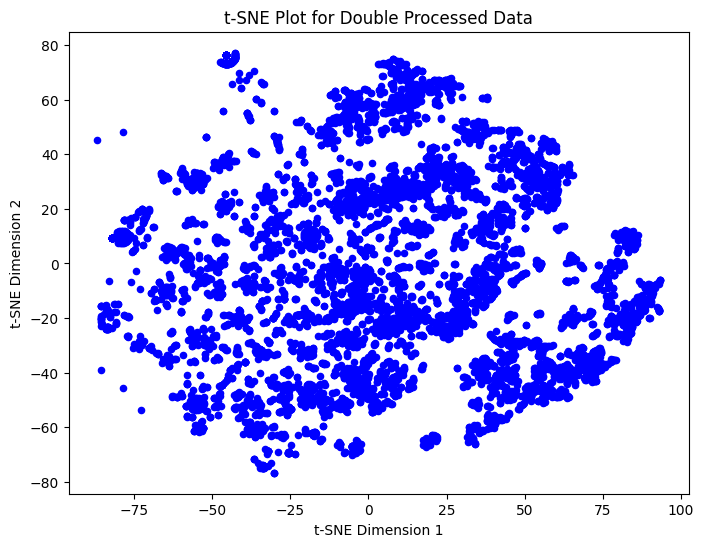

In [478]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = prepped_infrared_df2.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [479]:
clusters = kmeansfunc(prepped_infrared_df2, 10)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df2, clusters)
calinski_score(prepped_infrared_df2, clusters)
silhouetteScore(prepped_infrared_df2, clusters)

Inertia:  3797272064.508808
Davies-Bouldin Score: 1.3650384748399522
Calinski-Harabasz Score: 6878.575689738602
Silhouette Score: 0.7680452850582176


0.7680452850582176

In [480]:
clusters = kmeansfunc(prepped_infrared_df2, 2)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df2, clusters)
calinski_score(prepped_infrared_df2, clusters)
silhouetteScore(prepped_infrared_df2, clusters)

Inertia:  11172100781.2452
Davies-Bouldin Score: 0.6848884133348282
Calinski-Harabasz Score: 14727.997624261909
Silhouette Score: 0.8695890578167562


0.8695890578167562

In [481]:
pca_50 = PCAOnData(prepped_infrared_df2, 50)

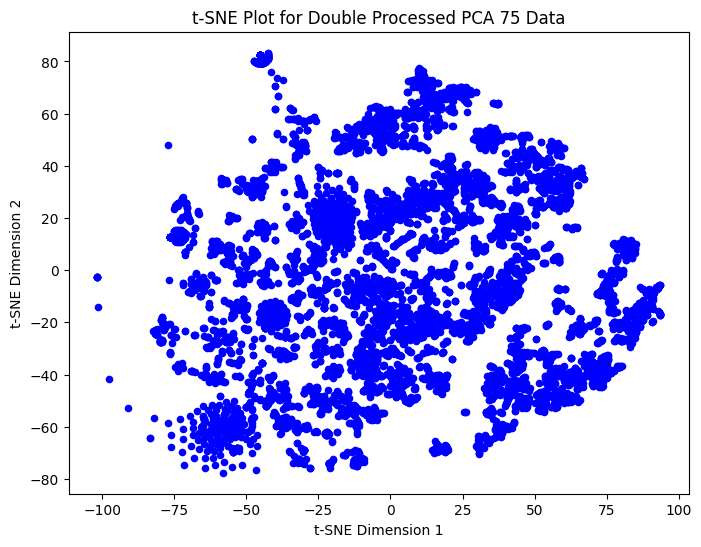

In [482]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(pca_50)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed PCA 75 Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [483]:
clusters = kmeansfunc(pca_50, 10)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
silhouetteScore(pca_50, clusters)

Inertia:  3566533802.1707497
Davies-Bouldin Score: 1.3088365001841085
Calinski-Harabasz Score: 7326.677596357153
Silhouette Score: 0.7738056738564101


0.7738056738564101

In [484]:
clusters = kmeansfunc(pca_50, 2)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
silhouetteScore(pca_50, clusters)

Inertia:  10951746367.86158
Davies-Bouldin Score: 0.6776464428709199
Calinski-Harabasz Score: 15024.302014622961
Silhouette Score: 0.8711227713724576


0.8711227713724576

In [485]:
clusters = kmeansfunc(pca_50, 5)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
silhouetteScore(pca_50, clusters)

Inertia:  5029365477.50735
Davies-Bouldin Score: 1.1882593415547187
Calinski-Harabasz Score: 10999.134296900806
Silhouette Score: 0.790693464869773


0.790693464869773

In [486]:
pca_3 = PCAOnData(prepped_infrared_df2,3)

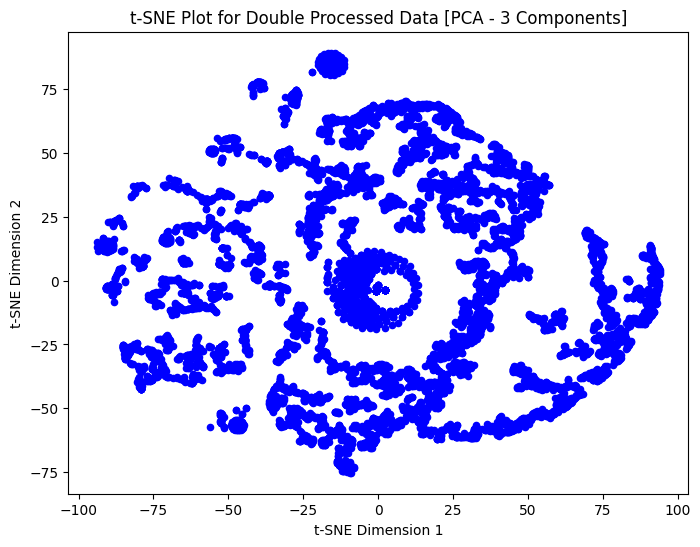

In [487]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [488]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19)
    kmeans.fit(pca_3) 
    wcss.append(kmeans.inertia_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

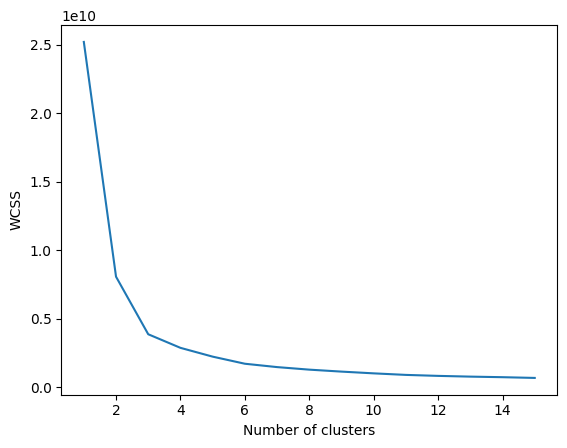

In [489]:
plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.annotate('Elbow',
             xy=(4, inertia[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.ylabel('WCSS') 
plt.show()

In [490]:
clusters = kmeansfunc(pca_3, 10)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
silhouetteScore(pca_3, clusters)

Inertia:  1003073449.8754396
Davies-Bouldin Score: 0.7449347213847477
Calinski-Harabasz Score: 25698.96101238792
Silhouette Score: 0.8059037211874006


0.8059037211874006

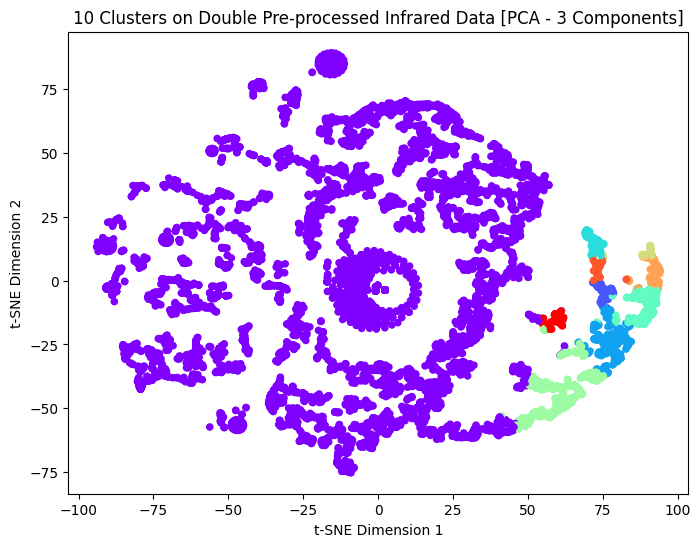

In [491]:
infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [492]:
clusters = kmeansfunc(pca_3, 2)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
silhouetteScore(pca_3, clusters)

Inertia:  8064329532.214502
Davies-Bouldin Score: 0.5666139537638535
Calinski-Harabasz Score: 20394.836191559163
Silhouette Score: 0.8916198226715294


0.8916198226715294

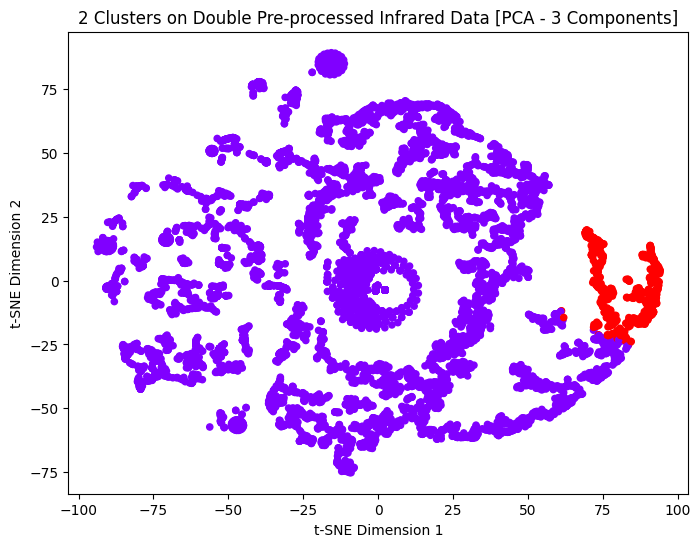

In [493]:
infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [494]:
clusters = kmeansfunc(pca_3, 5)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
silhouetteScore(pca_3, clusters)

Inertia:  2224059697.2584715
Davies-Bouldin Score: 0.7505944559471092
Calinski-Harabasz Score: 24776.714284684494
Silhouette Score: 0.8309704011370581


0.8309704011370581

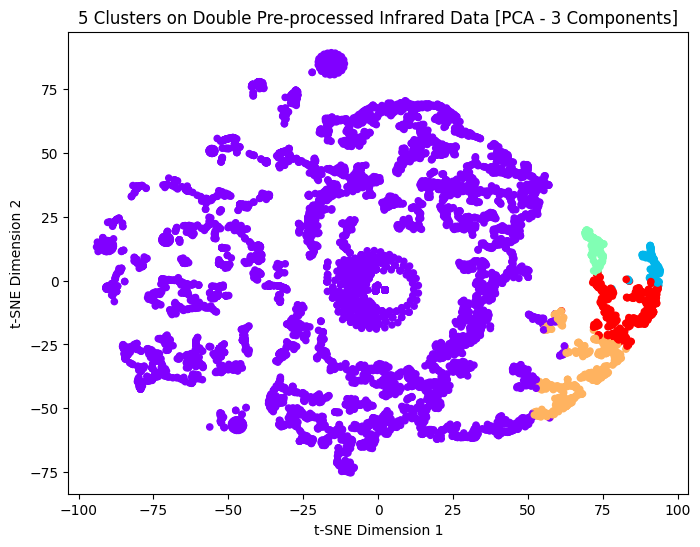

In [495]:
infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('5 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [496]:
import umap.umap_ as umap

data_df = prepped_infrared_df2.copy()
umap_model = umap.UMAP(n_components=2)
reduced_data = umap_model.fit_transform(data_df)

In [497]:
clusters = kmeansfunc(reduced_data, 10)
clusters = clusters.to_numpy().ravel()
db_score(reduced_data, clusters)
calinski_score(reduced_data, clusters)
silhouetteScore(reduced_data, clusters)

Inertia:  52166.9375
Davies-Bouldin Score: 0.5225151606727221
Calinski-Harabasz Score: 17842.56786105392
Silhouette Score: 0.57050234


0.57050234

In [498]:
from sklearn.random_projection import GaussianRandomProjection

data_df = prepped_infrared_df2.copy()
rp = GaussianRandomProjection(n_components=1000)
reduced_data = rp.fit_transform(data_df)

In [499]:
clusters = kmeansfunc(reduced_data, 10)
clusters = clusters.to_numpy().ravel()
db_score(reduced_data, clusters)
calinski_score(reduced_data, clusters)
silhouetteScore(reduced_data, clusters)

Inertia:  3801207131.505885
Davies-Bouldin Score: 1.3594755623514025
Calinski-Harabasz Score: 7074.802047004909
Silhouette Score: 0.7620990482104623


0.7620990482104623

In [500]:
from sklearn.manifold import Isomap
data_df = prepped_infrared_df2.copy()
isomap = Isomap(n_components=50)
reduced_data = isomap.fit_transform(data_df)


/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [501]:
iso_df = prepped_infrared_df2.copy()

In [502]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
iso_data = isomap.fit_transform(iso_df)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [503]:
clusters_10 = kmeansfunc(iso_data, 10)
clusters_10 = clusters_10.to_numpy().ravel()
db_score(iso_data, clusters_10)
calinski_score(iso_data, clusters_10)
silhouetteScore(iso_data, clusters_10)

Inertia:  5945987093.679817
Davies-Bouldin Score: 0.7589924808997024
Calinski-Harabasz Score: 22762.873358971607
Silhouette Score: 0.8479174738752612


0.8479174738752612

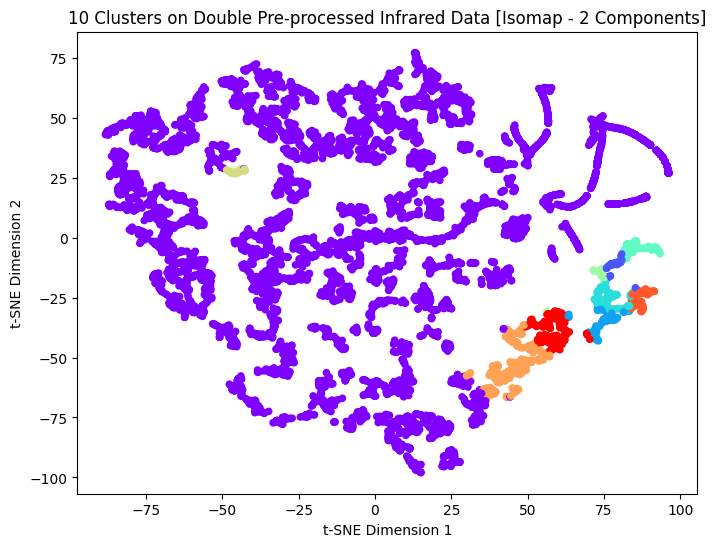

In [504]:
infrared_data = iso_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_10, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [505]:
clusters_2 = kmeansfunc(iso_data, 2)
clusters_2 = clusters_2.to_numpy().ravel()
db_score(iso_data, clusters_2)
calinski_score(iso_data, clusters_2)
silhouetteScore(iso_data, clusters_2)

Inertia:  44583064876.332436
Davies-Bouldin Score: 0.5549164990744844
Calinski-Harabasz Score: 19033.65008929505
Silhouette Score: 0.9109522225786233


0.9109522225786233

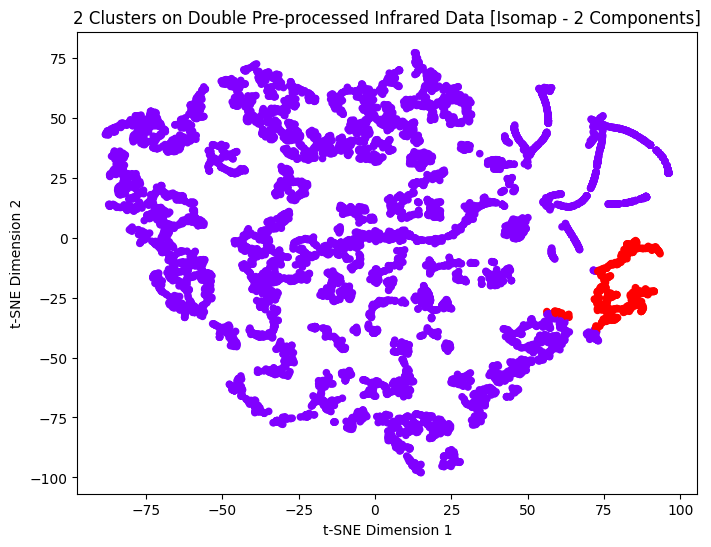

In [506]:
infrared_data = iso_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_2, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [507]:
clusters_5 = kmeansfunc(iso_data, 5)
clusters_5 = clusters_5.to_numpy().ravel()
db_score(iso_data, clusters_5)
calinski_score(iso_data, clusters_5)
silhouetteScore(iso_data, clusters_5)

Inertia:  12390569773.287992
Davies-Bouldin Score: 0.6254195921201628
Calinski-Harabasz Score: 23343.855274086935
Silhouette Score: 0.879148817653448


0.879148817653448

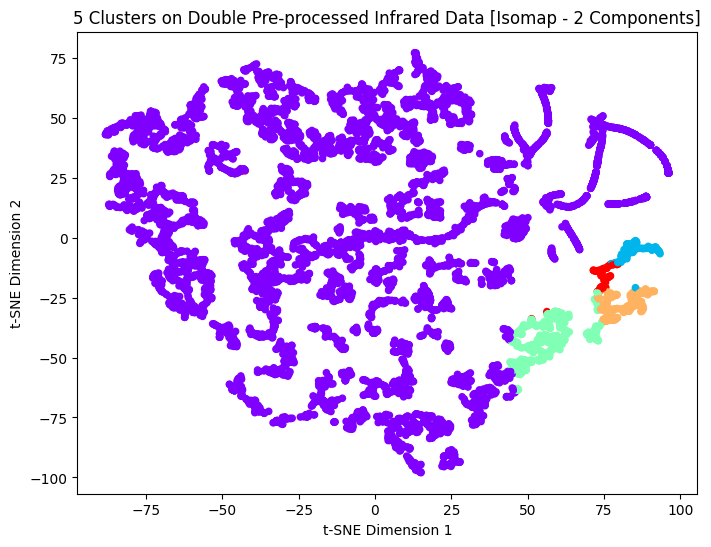

In [508]:
infrared_data = iso_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_5, cmap='rainbow', s=20)
plt.title('5 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

## Highest scores thus far:

#### 10 clusters - 0.9750181505494335 (Initial score - 0.14337657005172605)
#### 8 clusters - 0.9743239952747715 (Initial score - 0.15572181678470226)
#### 6 clusters - 0.9731338122205031 (Initial score - 0.20639571486279004)
#### 4 clusters - 0.9903732291634489 (Initial score - 0.3119771748068869)
#### 2 clusters - 0.845465747890616 (Initial score - 0.3568434794605163)

In [509]:
def lp_intensify(arr, lower_percentile, upper_percentile):
    lower_limit = np.percentile(arr, lower_percentile)
    upper_limit = np.percentile(arr, upper_percentile)
    
    arr[arr < lower_limit] = 0
    arr[arr > upper_limit] = 255
    
    return arr

data = iso_data.copy()
lower_frequency_data = lp_intensify(data, 87, 90)

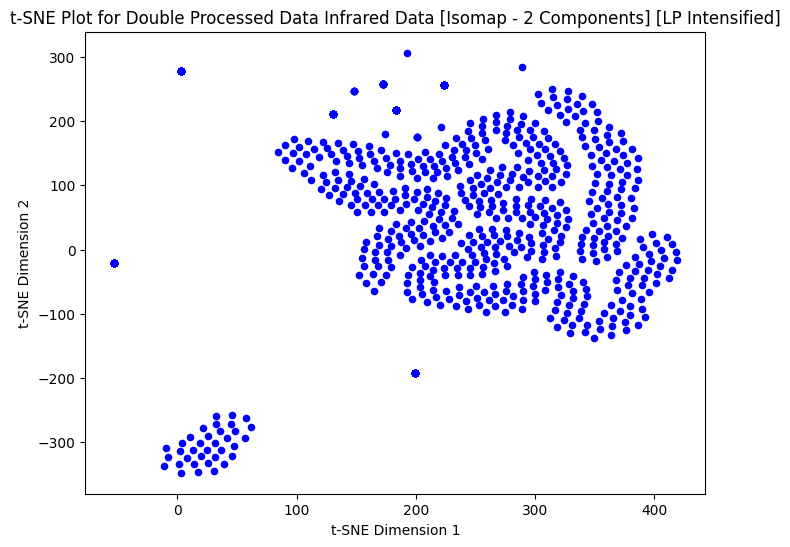

In [510]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [511]:
silhouette_scores = []
inertia = []
cluster_range = range(2, 16)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=19)
    graph_clusters = kmeans.fit_predict(lower_frequency_data)
    graph_clusters = pd.DataFrame(graph_clusters)
    inertia.append(kmeans.inertia_)
    score = silhouetteScore(lower_frequency_data, graph_clusters)
    silhouette_scores.append(score)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.845465747890616


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9559656747743789


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.990373229163449


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9717017101442617


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9731338122205044


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9736928880391771


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9743239952747714


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9742042201062544


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.97501815054944


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9736149826639664


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9727651975086373


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9732819224177184


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9733983070155839


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9726900107003655


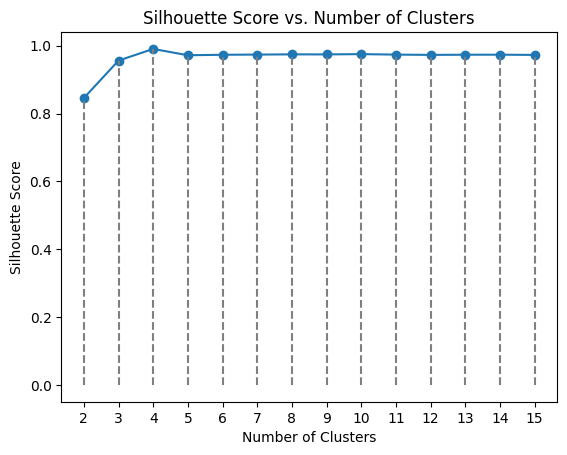

In [512]:
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouette_scores[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

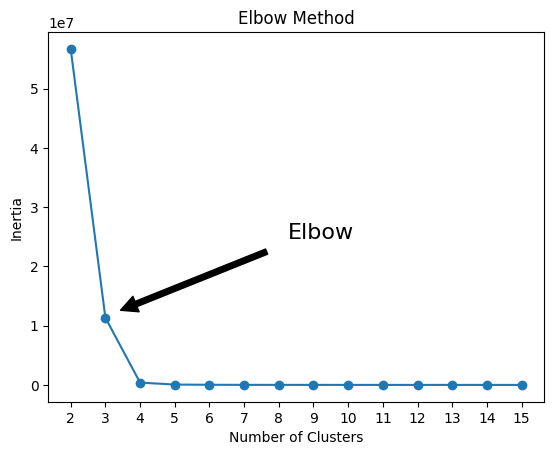

In [513]:
plt.plot(cluster_range, inertia, marker='o')
plt.xticks(cluster_range)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.annotate('Elbow',
             xy=(2.9, inertia[1]),
             xytext=(0.45, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title('Elbow Method')
plt.show()

In [514]:
clusters_2 = kmeansfunc(lower_frequency_data, 2)
clusters_2 = clusters_2.to_numpy().ravel()
db_score(lower_frequency_data, clusters_2)
calinski_score(lower_frequency_data, clusters_2)
silhouetteScore(lower_frequency_data, clusters_2)

Inertia:  56696803.32663625
Davies-Bouldin Score: 0.40553202501894076
Calinski-Harabasz Score: 15514.451471684282
Silhouette Score: 0.845465747890616


0.845465747890616

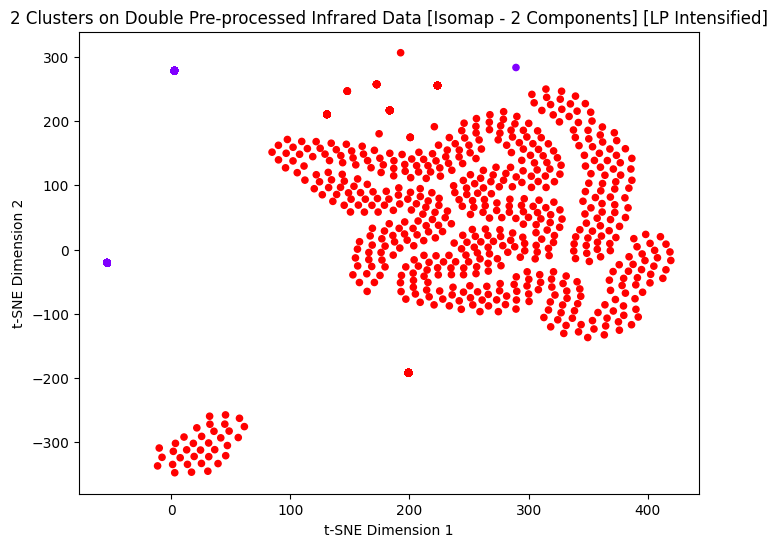

In [515]:
infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_2, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [516]:
clusters_4 = kmeansfunc(lower_frequency_data, 4)
clusters_4 = clusters_4.to_numpy().ravel()
db_score(lower_frequency_data, clusters_4)
calinski_score(lower_frequency_data, clusters_4)
silhouetteScore(lower_frequency_data, clusters_4)

Inertia:  392728.4241888956
Davies-Bouldin Score: 0.05626959710791062
Calinski-Harabasz Score: 1204679.9302375515
Silhouette Score: 0.990373229163449


0.990373229163449

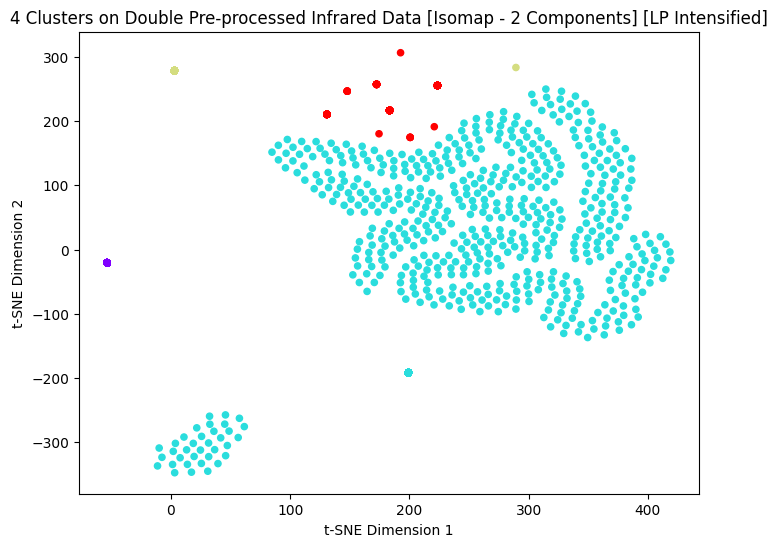

In [517]:
infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_4, cmap='rainbow', s=20)
plt.title('4 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [518]:
clusters_6 = kmeansfunc(lower_frequency_data, 6)
clusters_6 = clusters_6.to_numpy().ravel()
db_score(lower_frequency_data, clusters_6)
calinski_score(lower_frequency_data, clusters_6)
silhouetteScore(lower_frequency_data, clusters_6)

Inertia:  24317.701531933464
Davies-Bouldin Score: 0.23335995108711263
Calinski-Harabasz Score: 11701085.033893725
Silhouette Score: 0.9731338122205044


0.9731338122205044

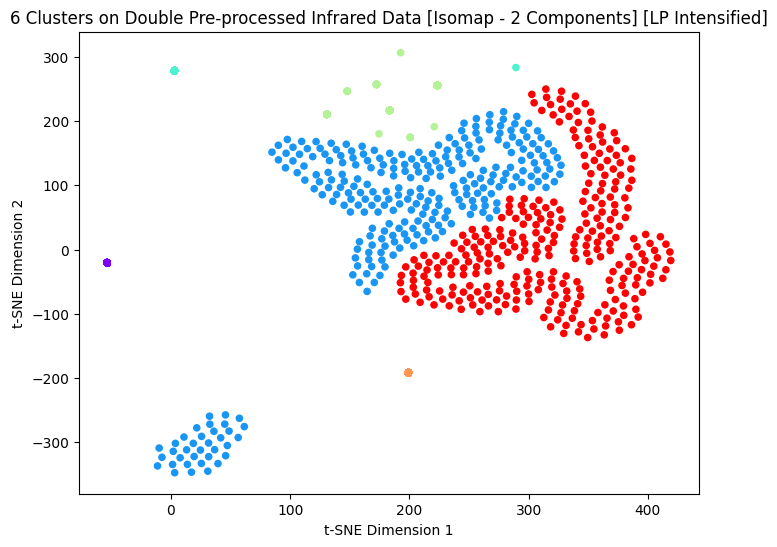

In [519]:
infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_6, cmap='rainbow', s=20)
plt.title('6 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [520]:
clusters_8 = kmeansfunc(lower_frequency_data, 8)
clusters_8 = clusters_8.to_numpy().ravel()
db_score(lower_frequency_data, clusters_8)
calinski_score(lower_frequency_data, clusters_8)
silhouetteScore(lower_frequency_data, clusters_8)

Inertia:  8454.905735560867
Davies-Bouldin Score: 0.2709218629018157
Calinski-Harabasz Score: 24055757.4622071
Silhouette Score: 0.9743239952747714


0.9743239952747714

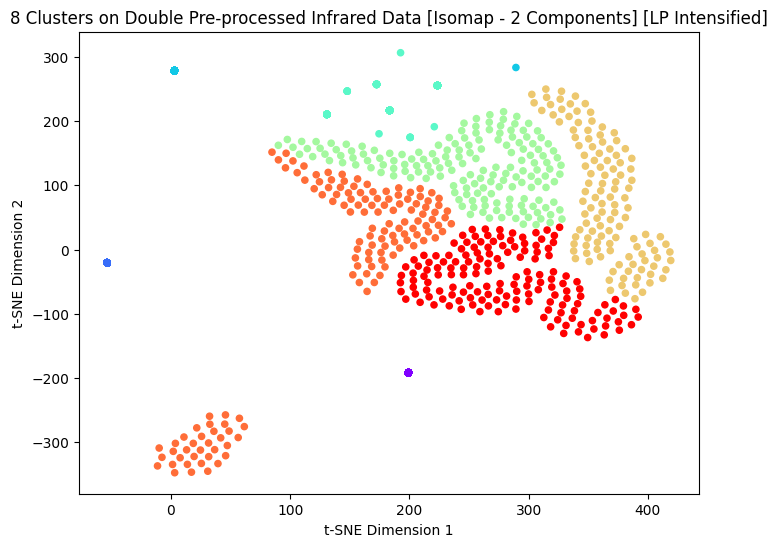

In [521]:
infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_8, cmap='rainbow', s=20)
plt.title('8 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [522]:
clusters_10 = kmeansfunc(lower_frequency_data, 10)
clusters_10 = clusters_10.to_numpy().ravel()
db_score(lower_frequency_data, clusters_10)
calinski_score(lower_frequency_data, clusters_10)
silhouetteScore(lower_frequency_data, clusters_10)

Inertia:  4432.314787373612
Davies-Bouldin Score: 0.25694051936564055
Calinski-Harabasz Score: 35662113.19112731
Silhouette Score: 0.97501815054944


0.97501815054944

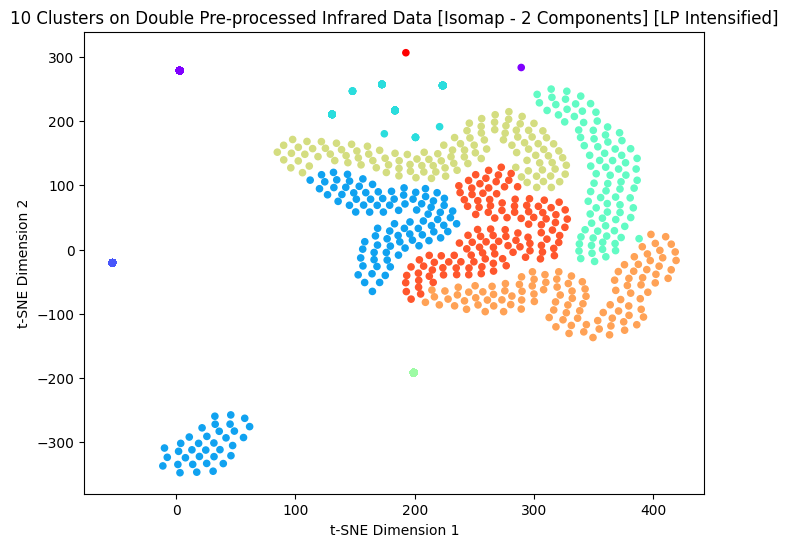

In [523]:
infrared_data = lower_frequency_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_10, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [524]:
lower_frequency_data.shape

(9593, 2)

In [525]:
change_to_df = pd.DataFrame(lower_frequency_data)
change_to_df.shape

(9593, 2)

In [526]:
infrared_data.shape

(9593, 2)

In [669]:
y_train = pd.read_csv('y_train_all.csv')
y_train = y_train.drop(outlier_indices)
y_train = np.asarray(y_train)
y_train.shape

(9593, 1)

In [528]:
p_df_accuracy = p_df.copy()
p_df_accuracy = p_df_accuracy.drop(outlier_indices)

In [529]:
p_df_accuracy.shape

(9593, 2304)

In [530]:
import cv2

def apply_median_filter_accuracy(image, kernel_size=37):
    image = image.astype(np.uint8)
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_blur_cv_accuracy(image, kernel_size=(15, 15)):
    return cv2.GaussianBlur(image, kernel_size, 0)

def apply_bilateral_filter_accuracy(image, diameter=25, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

In [531]:
image_df_accuracy = p_df_accuracy.copy()
accuracy = []

for index, row in image_df_accuracy.iterrows():
    image_data = row.values
    median_image = apply_median_filter_accuracy(image_data)
    gaussian_image = apply_gaussian_blur_cv_accuracy(median_image)
    median_image = apply_median_filter_accuracy(gaussian_image)
    gaussian_image = apply_gaussian_blur_cv_accuracy(median_image)
    accuracy.append(gaussian_image.flatten())

image_df_accuracy = pd.DataFrame(accuracy)
image_df_accuracy.shape

(9593, 2304)

In [532]:
# isomap = Isomap(n_components=500)
# test_pdf2 = isomap.fit_transform(p_df_accuracy)
isomap = Isomap(n_components=500)
test_pdf2 = isomap.fit_transform(image_df_accuracy)

In [736]:
kmeans = KMeans(n_clusters=10, random_state=19, n_init=10)
testing_df = iso_data.copy()
# testing_df.drop(outlier_indices, inplace=True)
cluster_labels = kmeans.fit_predict(testing_df)

In [737]:
data = []
labels = []

for cluster_label in np.unique(cluster_labels):
    cluster_mask = (cluster_labels == cluster_label)
    X_cluster = testing_df[cluster_mask]
    y_cluster = y_train[cluster_mask].flatten()
    majority_class = np.bincount(y_cluster).argmax()

    for unique_class in y_cluster:
        class_size = np.sum(y_cluster == unique_class)
    data.append(X_cluster)
    labels.append(y_cluster)

data = np.concatenate(data, axis=0)
labels = np.concatenate(labels)

In [738]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, labels)
accuracy

0.6782028562493485